In [3]:
import numpy as np
from uncertainties import ufloat, unumpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from lmfit.models import LinearModel

# Fitting power lock calibration 2016/04/13

In [28]:
data = pd.read_excel('power_lock-500kHz.xlsx', sheet_name='20160413')

# Only fit a subrange of data (see notebook, 2016/04/13)
data = data[(0 < data['DAC set point [V]']) & (data['DAC set point [V]'] < 9)]

[[Model]]
    Model(linear, prefix='line_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 11
    # variables        = 2
    chi-square         = 317.626314
    reduced chi-square = 35.2918127
    Akaike info crit   = 40.9927834
    Bayesian info crit = 41.7885739
[[Variables]]
    line_intercept:  78.0872501 +/- 2.84702705 (3.65%) (init = 0)
    line_slope:      258.915611 +/- 0.66058672 (0.26%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(line_intercept, line_slope) = -0.777



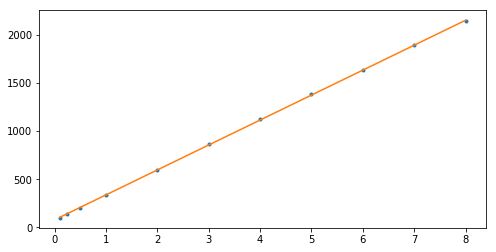

In [27]:
xdata = data['DAC set point [V]'] # x-data in [V]
ydata = data['Time averaged power to chamber [mW]']*1000 # y-data in [uW]

# Specify fit model
fit_model = LinearModel(prefix='line_')
fit_params = fit_model.make_params()

fit_params['line_slope'].set(1, vary=True)
fit_params['line_intercept'].set(0, vary=True)

# Initial guess
xfit = np.linspace(min(xdata), max(xdata), num=1000, endpoint=True)
yinit = fit_model.eval(fit_params, x=xfit)

# Fitting
fit_result = fit_model.fit(ydata, fit_params, x=xdata)
dely = fit_result.eval_uncertainty(x=xdata)
yfit = fit_model.eval(fit_result.params, x=xfit)

print(fit_result.fit_report())

# Plotting output
plt.figure(figsize=(8,4))

plt.plot(xdata, ydata, '.', label='data')
plt.plot(xfit, yfit, label='fit')

plt.show()

# Fitting power lock calibration 2016/04/14
Added ND513A (OD=1.3) filter to output

In [30]:
data = pd.read_excel('power_lock-500kHz.xlsx', sheet_name='20160414')
data

,Set point [V],Time averaged power to chamber [uW]
0,0.5,11.3
1,1.0,18.5
2,2.0,32.9
3,3.0,47.2
4,4.0,61.3
5,5.0,75.5
6,6.0,89.6
7,7.0,103.9
8,8.0,118.0
9,9.0,132.0


[[Model]]
    Model(linear, prefix='line_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 0.16896133
    reduced chi-square = 0.02112017
    Akaike info crit   = -36.8067050
    Bayesian info crit = -36.2015348
[[Variables]]
    line_intercept:  4.41319911 +/- 0.08775840 (1.99%) (init = 0)
    line_slope:      14.1992971 +/- 0.01643145 (0.12%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(line_intercept, line_slope) = -0.852



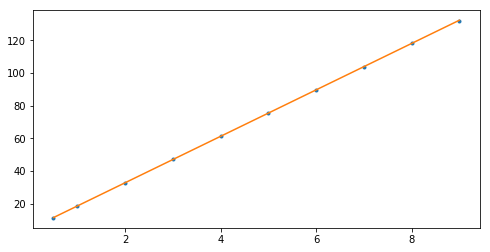

In [31]:
xdata = data['Set point [V]'] # x-data in [V]
ydata = data['Time averaged power to chamber [uW]'] # y-data in [uW]

# Specify fit model
fit_model = LinearModel(prefix='line_')
fit_params = fit_model.make_params()

fit_params['line_slope'].set(1, vary=True)
fit_params['line_intercept'].set(0, vary=True)

# Initial guess
xfit = np.linspace(min(xdata), max(xdata), num=1000, endpoint=True)
yinit = fit_model.eval(fit_params, x=xfit)

# Fitting
fit_result = fit_model.fit(ydata, fit_params, x=xdata)
dely = fit_result.eval_uncertainty(x=xdata)
yfit = fit_model.eval(fit_result.params, x=xfit)

print(fit_result.fit_report())

# Plotting output
plt.figure(figsize=(8,4))

plt.plot(xdata, ydata, '.', label='data')
plt.plot(xfit, yfit, label='fit')

plt.show()